 # Projeto - Previsão de sucesso de campanhas de marketing

[https://www.kaggle.com/loveall/clicks-conversion-tracking](https://www.kaggle.com/loveall/clicks-conversion-tracking)

# Descrição do problema

A empresa XYZ é uma grande empresa de streaming de vídeo e está enfrentando um alto índice de cancelamento de assinaturas. Eles coletaram dados dos usuários, incluindo informações sobre o uso do serviço, a taxa de assinatura e a satisfação do cliente. Neste problema, você pode usar um conjunto de dados do Kaggle que contém informações sobre anúncios on-line de uma empresa. O conjunto de dados contém informações sobre o anúncio, o site em que o anúncio foi exibido, o horário em que o anúncio foi exibido e a ação do usuário em relação ao anúncio (clique ou conversão). Você pode treinar um modelo de classificação usando esses recursos para prever se um usuário irá clicar ou converter em um anúncio e avaliar o desempenho do modelo usando métricas como precisão, recall e F1-score. A empresa pode usar esse modelo para segmentar seus usuários de acordo com a probabilidade de clicar ou converter em um anúncio e direcionar seus recursos de publicidade de maneira mais eficiente.

## *Tabela Variável*

Esta tabela contém informações sobre as variáveis presentes no conjunto de dados.

| Nome da Variável | Descrição da Variável |
| --- | --- |
| ad_id | O ID do anúncio |
| xyz_campaign_id | O ID da campanha de publicidade |
| fb_campaign_id | O ID da campanha de publicidade no Facebook |
| age | A idade do usuário que visualizou o anúncio |
| gender | O gênero do usuário que visualizou o anúncio |
| interest | O código de interesse do usuário (mais de um código é possível) |
| Impressions | O número de vezes que o anúncio foi exibido |
| Clicks | O número de vezes que o anúncio foi clicado |
| Spent | O valor gasto na exibição do anúncio |
| Total_Conversion | O número de conversões após a visualização do anúncio |
| Approved_Conversion | O número de conversões após a aprovação do anúncio |

# Explicação da variável resposta

No conjunto de dados "Clicks Conversion Tracking", as variáveis "Total_Conversion" e "Approved_Conversion" representam o número de conversões que ocorreram após a visualização e aprovação do anúncio, respectivamente. Portanto, dependendo do objetivo da análise, você pode escolher uma dessas variáveis como sua variável resposta. Por exemplo, se você estiver interessado em prever quantas conversões ocorrerão após a visualização do anúncio, "Total_Conversion" seria sua variável resposta. Se você estiver interessado em prever quantas conversões ocorrerão após a aprovação do anúncio, "Approved_Conversion" seria sua variável resposta.

# Imports 

In [321]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings('ignore')

# Loading Datas 

In [322]:
df = pd.read_csv('KAG_conversion_data.csv')

In [323]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.19,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.88,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.29,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.71,8,2


# datas Descreption

In [324]:
df2= df.copy()

In [325]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,987261.13,1067.38,133783.99,32.77,186732.13,33.39,51.36,2.86,0.94
std,193992.81,121.63,20500.31,26.95,312762.18,56.89,86.91,4.48,1.74
min,708746.00,916.00,103916.00,2.00,87.00,0.00,0.00,0.00,0.00
25%,777632.50,936.00,115716.00,16.00,6503.50,1.00,1.48,1.00,0.00
50%,1121185.00,1178.00,144549.00,25.00,51509.00,8.00,12.37,1.00,1.00
75%,1121804.50,1178.00,144657.50,31.00,221769.00,37.50,60.02,3.00,1.00
max,1314415.00,1178.00,179982.00,114.00,3052003.00,421.00,639.95,60.00,21.00


# Rename Columns 

In [326]:
df2.columns = df2.columns.str.lower()

In [327]:
df2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# Datas Dimension 

In [328]:
print(f' Quantidade de Linhas : {df2.shape[0]}')
print(f' Quantidade de Colunas : {df2.shape[1]}')

 Quantidade de Linhas : 1143
 Quantidade de Colunas : 11


# Change Type 

In [329]:
df2.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
impressions              int64
clicks                   int64
spent                  float64
total_conversion         int64
approved_conversion      int64
dtype: object

# Check NaN

In [330]:
df2.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [331]:
df2.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [332]:
num_attrs = df2.select_dtypes(include=['int64', 'int32',  'float64'])
cat_attrs = df2.select_dtypes(exclude=['int32', 'int64', 'float64', 'datetime64[ns]'])

 # Numerical Attributes 

In [333]:
# central tendency - mean, media
ct1 = pd.DataFrame(num_attrs.apply(np.mean)).T
ct2 = pd.DataFrame(num_attrs.apply(np.median)).T

# disperation - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attrs.apply(np.std)).T
d2 = pd.DataFrame(num_attrs.apply(min)).T
d3 = pd.DataFrame(num_attrs.apply(max)).T
d4 = pd.DataFrame(num_attrs.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attrs.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attrs.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2,d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attrs', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attrs,min,max,range,mean,median,std,skew,kurtosis
0,ad_id,708746.00,1314415.00,605669.00,987261.13,1121185.00,193907.93,-0.10,-1.41
1,xyz_campaign_id,916.00,1178.00,262.00,1067.38,1178.00,121.58,-0.19,-1.96
2,fb_campaign_id,103916.00,179982.00,76066.00,133783.99,144549.00,20491.34,0.52,-0.25
3,interest,2.00,114.00,112.00,32.77,25.00,26.94,1.77,2.23
4,impressions,87.00,3052003.00,3051916.00,186732.13,51509.00,312625.34,3.01,13.12
5,clicks,0.00,421.00,421.00,33.39,8.00,56.87,2.71,8.54
6,spent,0.00,639.95,639.95,51.36,12.37,86.87,2.71,8.84
7,total_conversion,0.00,60.00,60.00,2.86,1.00,4.48,5.10,38.59
8,approved_conversion,0.00,21.00,21.00,0.94,1.00,1.74,4.84,34.59


In [334]:
# normalização de visualização dos números
pd.options.display.float_format = '{:.2f}'.format

# Exibe o DataFrame com os números normalizados
print(m)

                 attrs       min        max      range      mean     median  \
0                ad_id 708746.00 1314415.00  605669.00 987261.13 1121185.00   
1      xyz_campaign_id    916.00    1178.00     262.00   1067.38    1178.00   
2       fb_campaign_id 103916.00  179982.00   76066.00 133783.99  144549.00   
3             interest      2.00     114.00     112.00     32.77      25.00   
4          impressions     87.00 3052003.00 3051916.00 186732.13   51509.00   
5               clicks      0.00     421.00     421.00     33.39       8.00   
6                spent      0.00     639.95     639.95     51.36      12.37   
7     total_conversion      0.00      60.00      60.00      2.86       1.00   
8  approved_conversion      0.00      21.00      21.00      0.94       1.00   

        std  skew  kurtosis  
0 193907.93 -0.10     -1.41  
1    121.58 -0.19     -1.96  
2  20491.34  0.52     -0.25  
3     26.94  1.77      2.23  
4 312625.34  3.01     13.12  
5     56.87  2.71      8.54  

# datas Analysis 

In [335]:
df3 = df2.copy()

# Univariate Analysism

## Variavel Resposta

Irei colocar mais uma tabela, e entrará no meio dessas 


| Nome da Variável | Descrição da Variável |
| --- | --- |
| ad_id | O ID do anúncio |
| xyz_campaign_id | O ID da campanha de publicidade |
| fb_campaign_id | O ID da campanha de publicidade no Facebook |
| age | A idade do usuário que visualizou o anúncio |
| gender | O gênero do usuário que visualizou o anúncio |
| interest | O código de interesse do usuário (mais de um código é possível) |
| Impressions | O número de vezes que o anúncio foi exibido |
| Clicks | O número de vezes que o anúncio foi clicado |
| Spent | O valor gasto na exibição do anúncio |
| Total_Conversion | O número de conversões após a visualização do anúncio |
| Approved_Conversion | O número de conversões após a aprovação do anúncio |
| clickToImpPer | mede a taxa de cliques em relação ao número de impressões |


## Explicação da ultima coluna 

foi adicionada a clickToImper, que a função é medir as taxas de cliques em relações aos números de impressões, que estão medindo por porcentam, que mede a cada 1000 impressões 1%, então se vai aumentando, vai contribuindo mais.


In [336]:
df3['clickToImpPer']=(df3['clicks']/df3['impressions'])*100
df3

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.01
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.01
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.02
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.19,13,2,0.02
1139,1314411,1178,179978,45-49,F,110,637549,120,173.88,3,0,0.02
1140,1314412,1178,179979,45-49,F,111,151531,28,40.29,2,0,0.02
1141,1314414,1178,179981,45-49,F,113,790253,135,198.71,8,2,0.02


# Struture Datas 

querendo saber com mais detalhes quais foram o maximo de cada coluna para ter uma capacidade de informação melhor.

### clicktoimper 

No Grafico abaixo, mostra a porcentagem de pessoas que clicam e retorna resultados com o valor investido nos anúncios, porém, a '0.02' quer dizer que comparado as impressões 2% das impressões foram os que deram resultados no marketing da empresa.

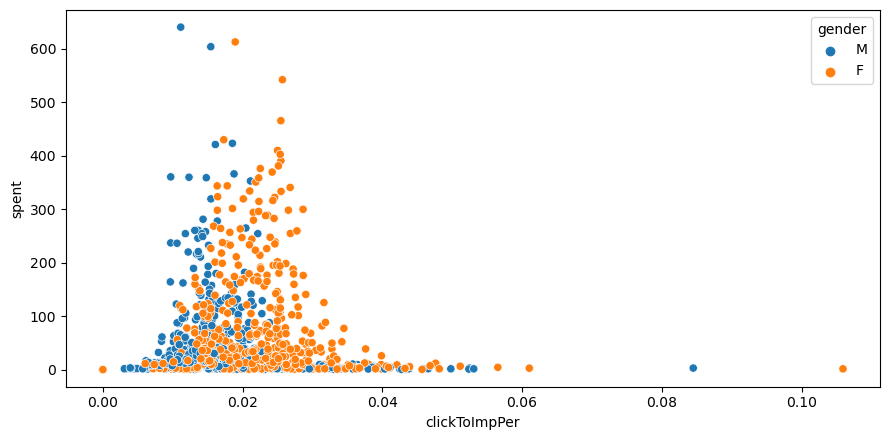

In [337]:
sns.scatterplot(x='clickToImpPer', y='spent', hue='gender', data=df3);


### Clicks 

No Grafico abaixo, mostra os clicks de pessoas nos anúncios com comparação ao valor investidos nos anúncios.

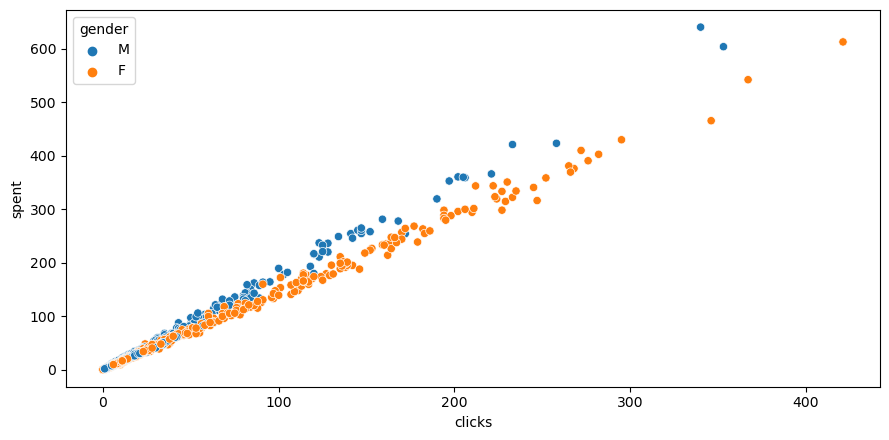

In [338]:
sns.scatterplot(x='clicks', y='spent',hue='gender', data=df3);

No Grafico abaixo, mostra os clicks de pessoas nos anúncios com comparação aos porcentagem de resultado ao anúncios.

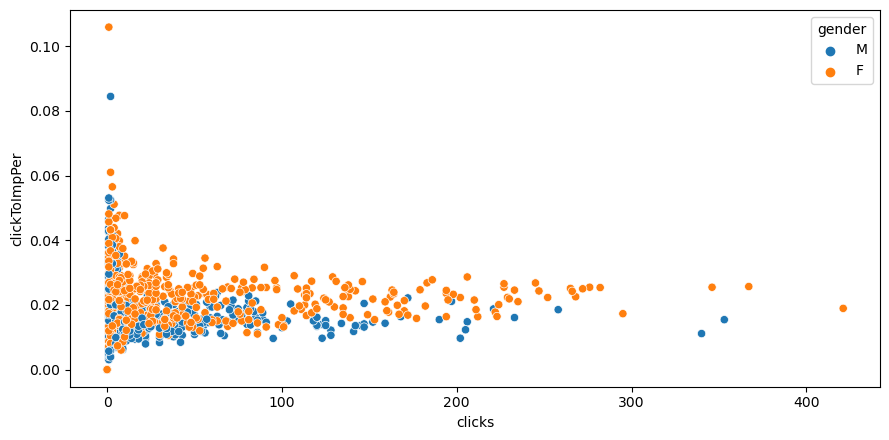

In [339]:
sns.scatterplot(x='clicks', y='clickToImpPer',hue='gender', data=df3);

aqui podemos ver, que quanto mais você investe mais chega ao público 

In [340]:
df3['spent'].max()

639.9499981

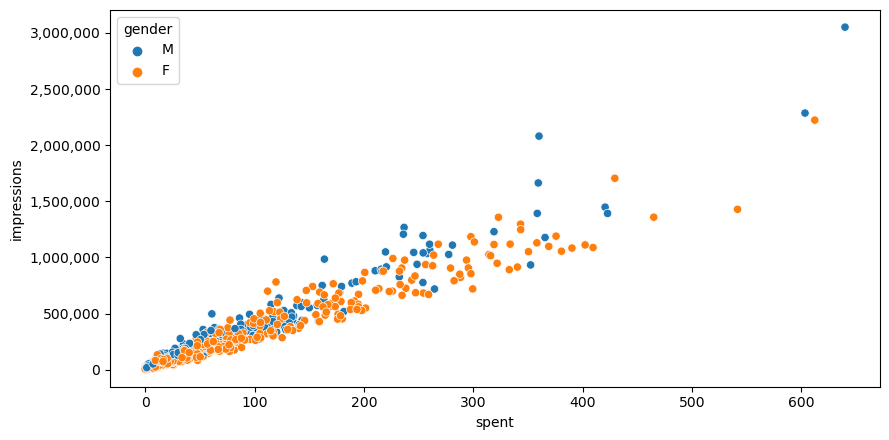

In [341]:


sns.scatterplot(x='spent', y='impressions',hue='gender', data=df2);
formatter = mtick.StrMethodFormatter('{x:,.0f}') # define o formato de números normais sem decimais

plt.gca().xaxis.set_major_formatter(formatter) # define o formato para o eixo x
plt.gca().yaxis.set_major_formatter(formatter) # define o formato para o eixo y

# exibir o gráfico
plt.show()


In [342]:
df3['total_conversion'].max()

60

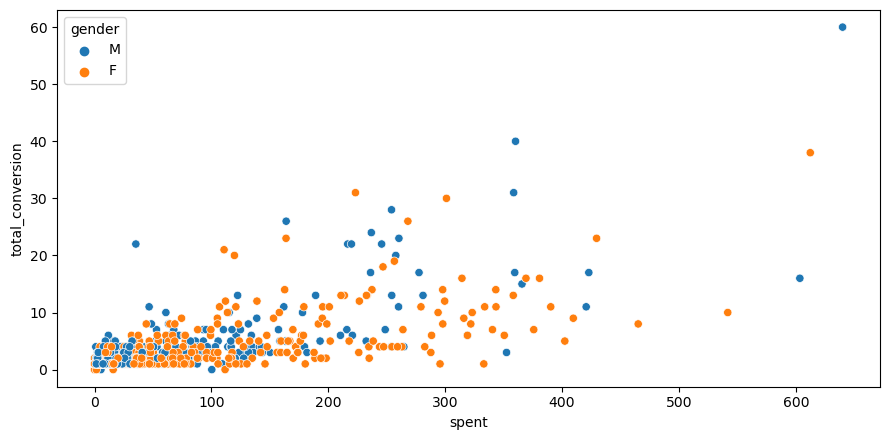

In [343]:
sns.scatterplot(x='spent', y='total_conversion',hue='gender', data=df2);

podemos reparar que o maximos dessas duas coluna nos mostra que não precisamos gastar rios de dinheiro nos anúncios para tranforma em clicks e nem resultados para voltar resultados, pórem, para transforma e chegar em mais pessoas, fica mais facil gastar dinheiro. 

# approved_conversion

In [344]:
df3.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.01
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.01
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.02
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.02


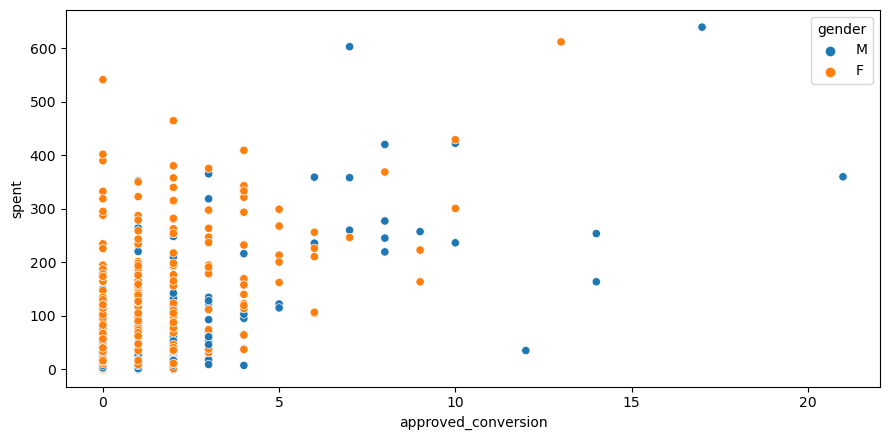

In [345]:
sns.scatterplot(x='approved_conversion', y='spent',hue='gender', data=df3);

In [346]:
df3.loc[df3['approved_conversion'] == 21]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,clickToImpPer
528,1121104,1178,144533,30-34,M,16,2080666,202,360.15,40,21,0.01


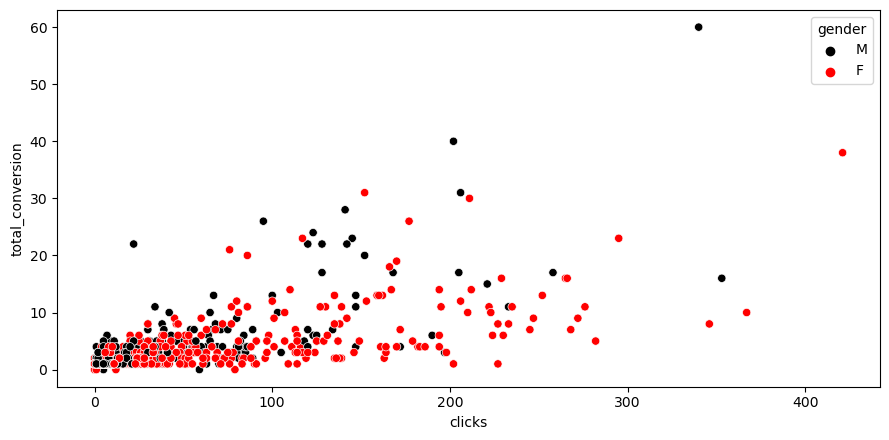

In [347]:
# Plot Total Conversions vs Clicks for each gender 

sns.scatterplot(x = df3['clicks'], y = df3['total_conversion'], hue=df3["gender"], palette = ['black','red'])
plt.show()

podemos reparar que temos que ter um anúncio chamativo e que o preço que gastamos para chegar e ter mais visibilidade, não importa muito, se seu anúncio for ruim.

# Graphics datas 

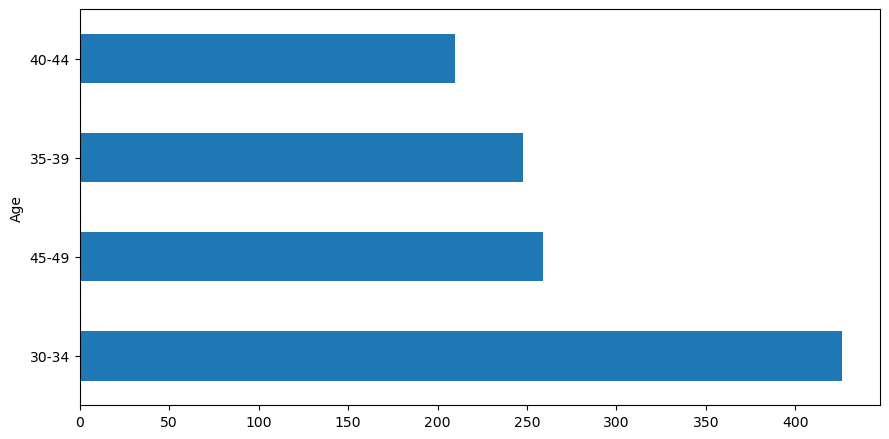

In [348]:
# Plot for frequency of people in each age group

plt.rcParams["figure.figsize"] = [9, 4.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df3['age'].value_counts().plot(ax=ax, kind='barh', xlabel='Age', ylabel='Frequency')
plt.show()

 Percebemos que o publico alvo são em média das idades 30-34, vemos que é a maioria.

In [349]:
dados_demograficos = df3[['gender', 'clicks', 'spent', 'total_conversion', 'approved_conversion', 'clickToImpPer']]


M   51.79
F   48.21


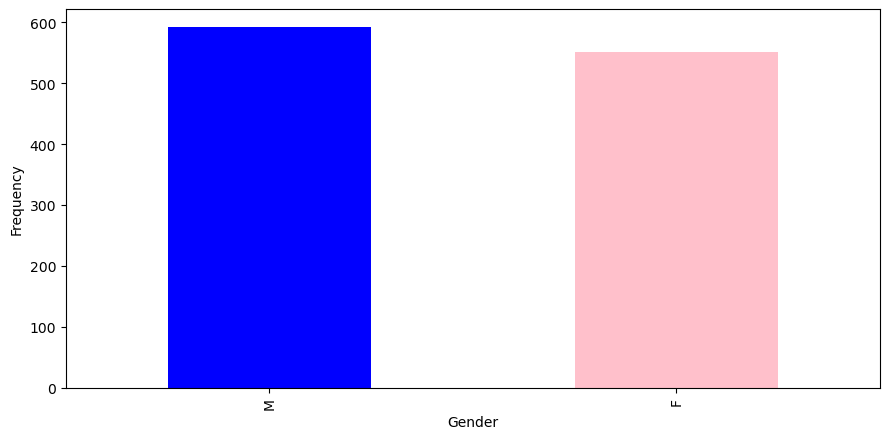

In [350]:
fig, ax = plt.subplots()

print((dados_demograficos['gender'].value_counts(normalize=True) * 100).to_string())

df3['gender'].value_counts().plot(ax=ax, kind='bar',color=['blue', 'pink'], xlabel='Gender', ylabel='Frequency')
plt.show()



Percebemos que entre Homens e Mulheres, não a muita diferença, percebemos que só tem 3.58% a mais, e não há muita diferença perceptivel

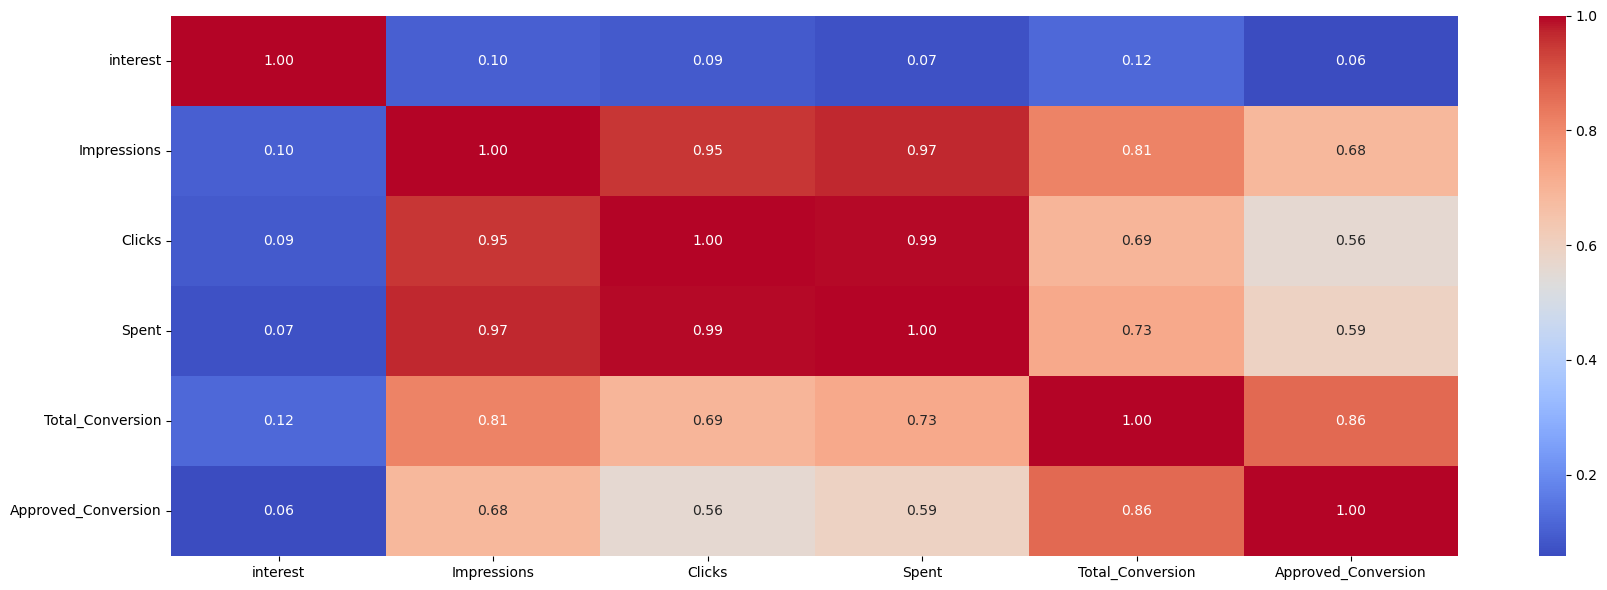

In [351]:
plt.figure(figsize=(18,6))
x=sns.heatmap(df[df.columns.difference(['ad_id','fb_campaign_id','xyz_campaign_id'], sort=False)].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

In [352]:
# Grouping the data based on Age and Gender

df3_f = df3.groupby(['age','gender'],as_index=False)[['interest','impressions','spent','total_conversion','clicks']].mean()
df3_f['clickToImpPer']=df3['clicks']/df3['impressions']
df3_f

,age,gender,interest,impressions,spent,total_conversion,clicks,clickToImpPer
0,30-34,F,31.88,160261.81,38.64,3.14,25.88,0.00
1,30-34,M,29.91,159045.60,33.37,3.55,19.14,0.00
2,35-39,F,36.43,196692.71,55.61,2.79,38.17,0.00
3,35-39,M,31.86,148670.06,36.34,2.32,21.10,0.00
4,40-44,F,36.00,218655.84,69.13,3.01,48.38,0.00
5,40-44,M,32.80,157360.50,40.71,1.95,24.84,0.00
6,45-49,F,33.90,278663.70,97.34,2.89,68.41,0.00
7,45-49,M,33.17,208903.03,60.47,2.36,36.45,0.00


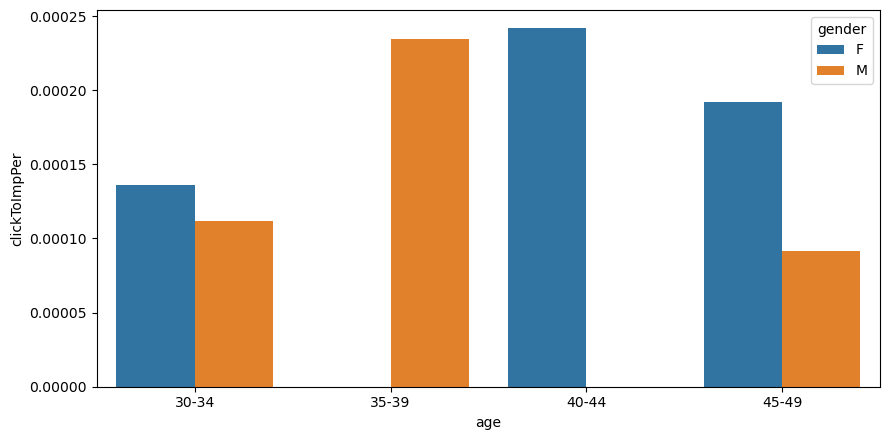

In [353]:
sns.barplot(x=df3_f.age,y=df3_f.clickToImpPer, hue=df3_f.gender)
plt.show()

podemos ver que quem mais obteve com clicks com as impressões do gênero é feminino 

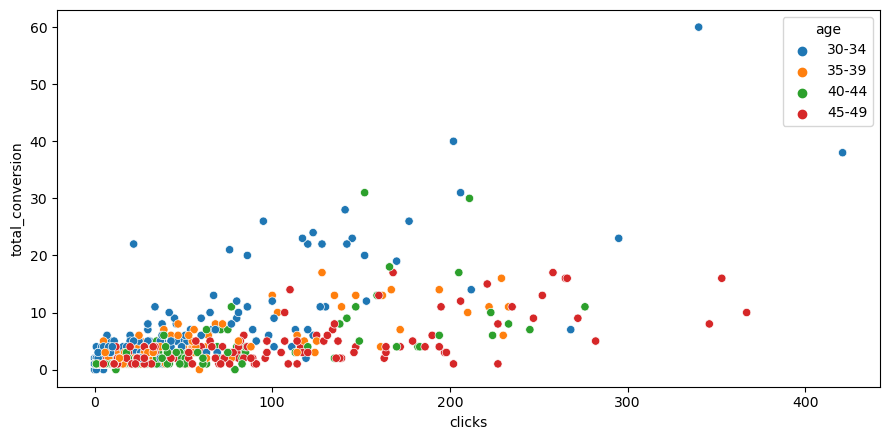

In [354]:
# Scatterplot showing Total Conversions vs Clicks for each age group

sns.scatterplot(x = df3['clicks'], y = df3['total_conversion'], hue=df3["age"])
plt.show()

Aqui podemos ver que o gráfico demonstra a conversão de clicks para conversão pela as idades.

In [355]:
df3.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.01
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.01
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.02
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.02


In [356]:
# Group the data based on fb campaigh id
df3_f =df.groupby("fb_campaign_id")[["interest","Impressions","Spent","Total_Conversion","Clicks"]].mean()

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled_features = scaled.fit_transform(df3_f.values)



# Standard Scaling the data

df3_f=pd.DataFrame(scaled_features)
df3_f = df3_f.rename(columns = {0:'interest',1:'impressions',2:'spent',3:'total_conversion',4:"clicks",5:"clickToImpPer"})
df3_f

,interest,impressions,spent,total_conversion,clicks
0,-0.72,-0.54,-0.54,-0.11,-0.53
1,-0.69,-0.50,-0.53,-0.11,-0.50
2,-0.56,-0.57,-0.56,-0.41,-0.55
3,-0.31,-0.56,-0.54,-0.41,-0.53
4,-0.27,-0.57,-0.56,-0.41,-0.55
...,...,...,...,...,...
686,2.27,4.50,5.14,3.28,5.35
687,2.30,2.29,2.21,0.20,2.26
688,2.33,0.10,0.08,-0.11,0.10
689,2.40,2.97,2.60,1.74,2.61


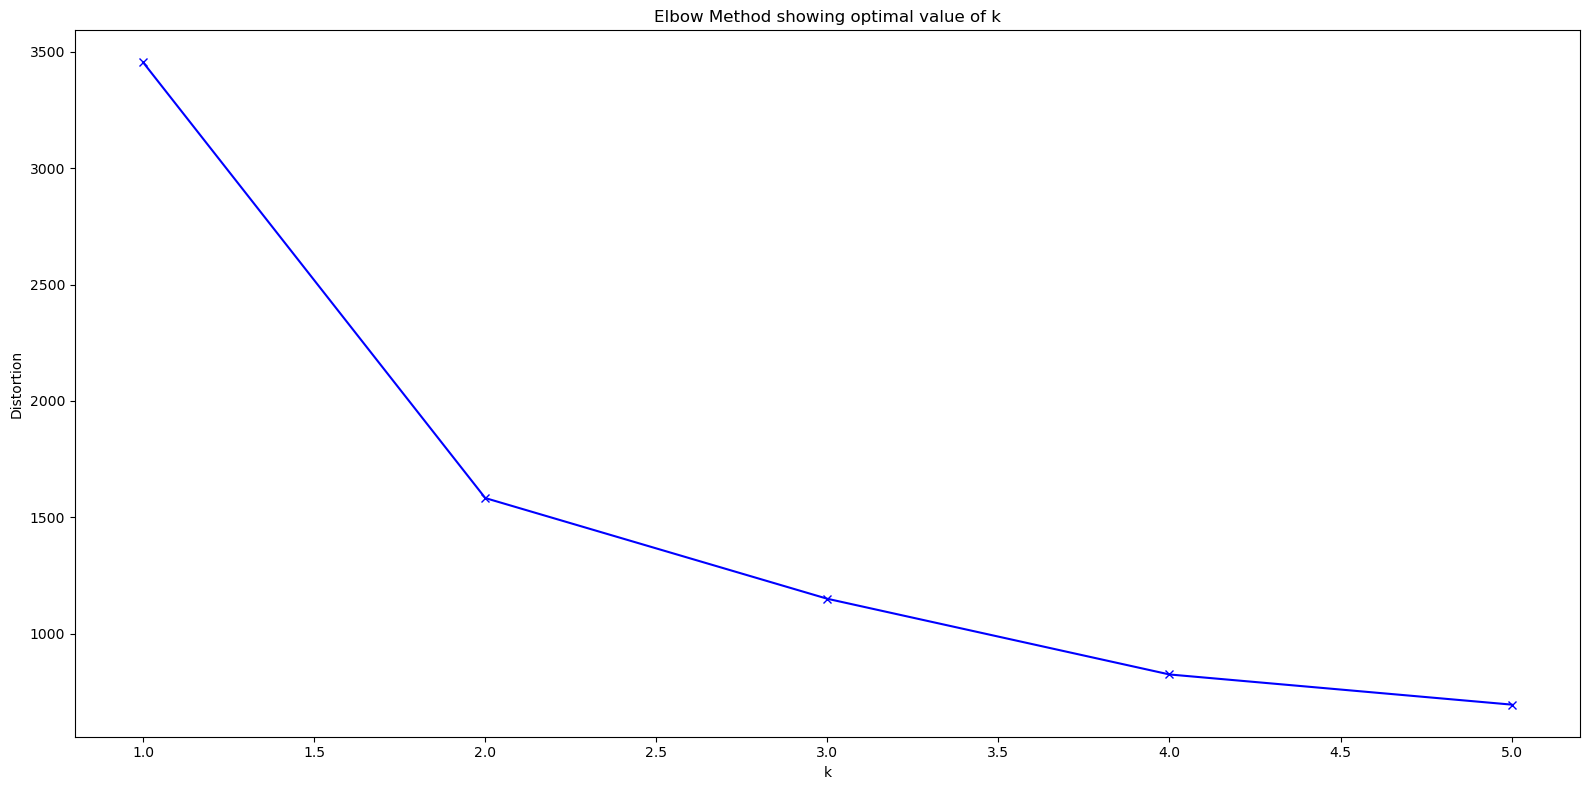

In [357]:
# Elbow Method

distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_features)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method showing optimal value of k')
plt.show()    

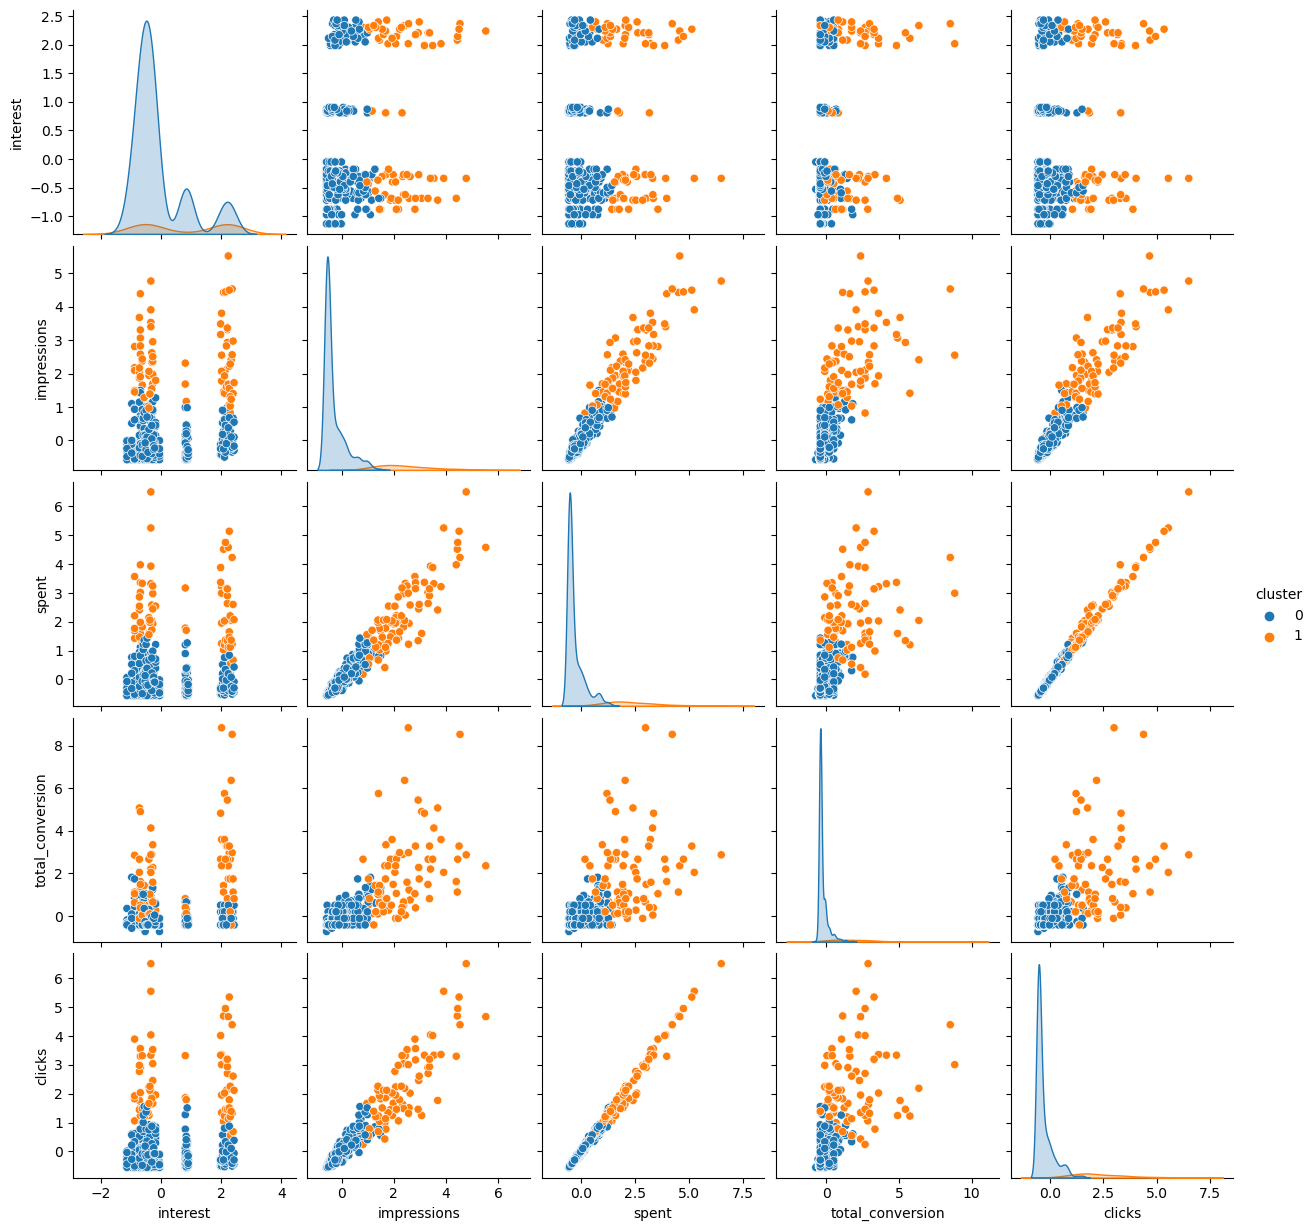

In [358]:
model = KMeans(n_clusters=2)
model.fit(scaled_features)
df3_f['cluster'] = model.predict(scaled_features)


sns.pairplot(df3_f,hue='cluster')
plt.show()

In [359]:
df3_f[df3_f["cluster"]==0]

,interest,impressions,spent,total_conversion,clicks,cluster
0,-0.72,-0.54,-0.54,-0.11,-0.53,0
1,-0.69,-0.50,-0.53,-0.11,-0.50,0
2,-0.56,-0.57,-0.56,-0.41,-0.55,0
3,-0.31,-0.56,-0.54,-0.41,-0.53,0
4,-0.27,-0.57,-0.56,-0.41,-0.55,0
...,...,...,...,...,...,...
679,2.05,0.18,0.01,-0.11,0.01,0
680,2.08,-0.25,-0.30,-0.41,-0.29,0
683,2.17,-0.10,-0.02,-0.41,-0.01,0
685,2.24,0.38,0.20,0.51,0.22,0


# model Sklearn 

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix, classification_report
from sklearn.ensemble        import RandomForestRegressor
from sklearn.metrics         import accuracy_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC



In [361]:
df3.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.01
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.01
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.02
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.02


In [362]:
df3

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,clickToImpPer
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.01
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.01
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.00
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.02
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.19,13,2,0.02
1139,1314411,1178,179978,45-49,F,110,637549,120,173.88,3,0,0.02
1140,1314412,1178,179979,45-49,F,111,151531,28,40.29,2,0,0.02
1141,1314414,1178,179981,45-49,F,113,790253,135,198.71,8,2,0.02


In [363]:
# selecionar as variáveis preditoras e a variável target
X = df3[['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest']]
y = df3['total_conversion'] #+ df2['approved_conversion']


X = pd.get_dummies(X, columns=['age', 'gender'])

# dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [364]:
# instanciar o modelo
logreg = LogisticRegression()

# treinar o modelo nos dados de treinamento
logreg.fit(X_train, y_train)


LogisticRegression()

In [365]:
# fazer previsões nos dados de teste
y_pred = logreg.predict(X_test)

# avaliar a precisão do modelo
print(confusion_matrix(y_test, y_pred))



[[145   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 26   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0

Correlação entre células: 1.00


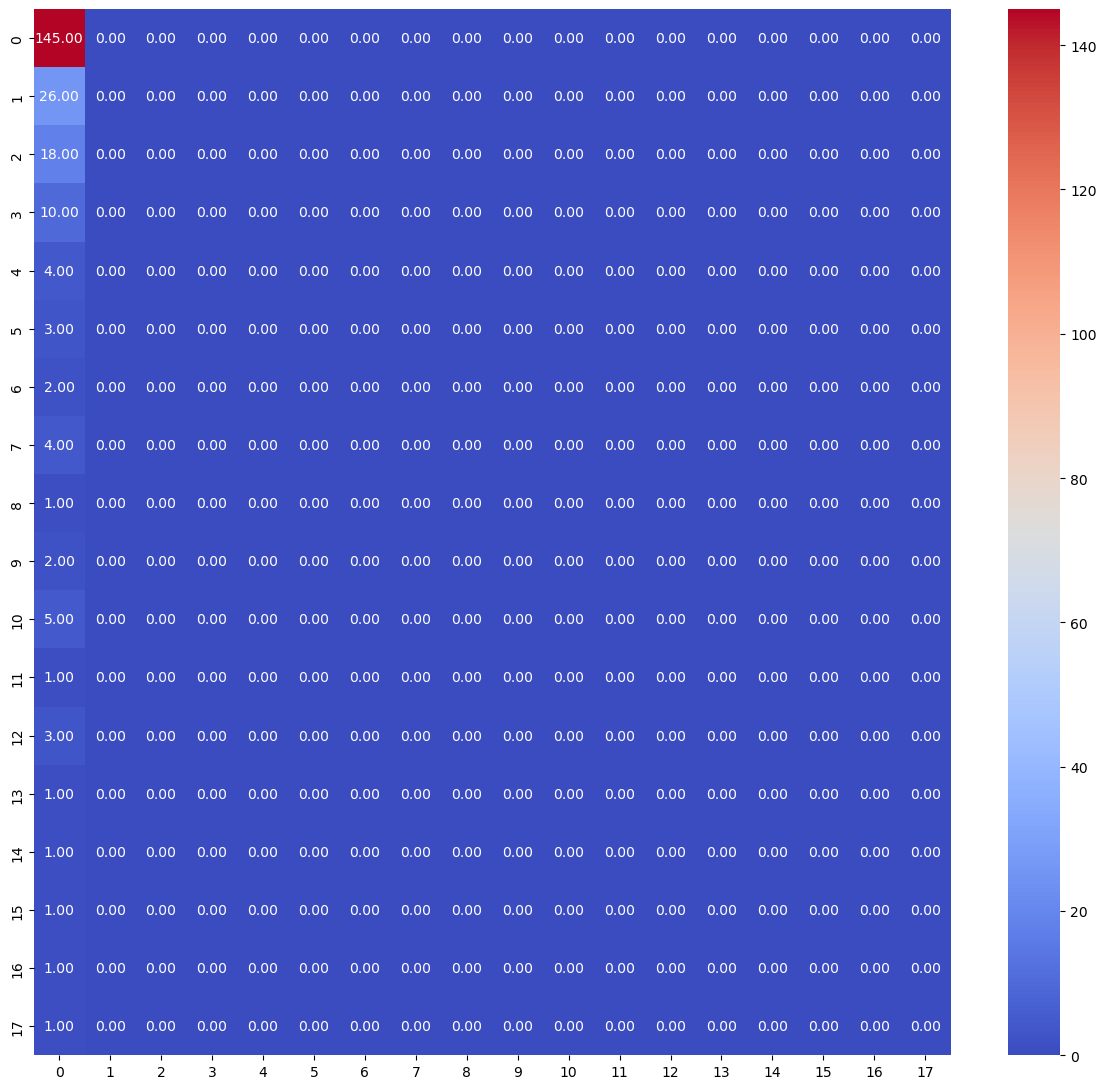

In [366]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 11))

axs = sns.heatmap(cm, annot=True, fmt=".2f", cmap="coolwarm")

correlation_matrix = np.corrcoef(cm)
print(f"Correlação entre células: {correlation_matrix[0,1]:.2f}")


Correlação entre células: 1.00


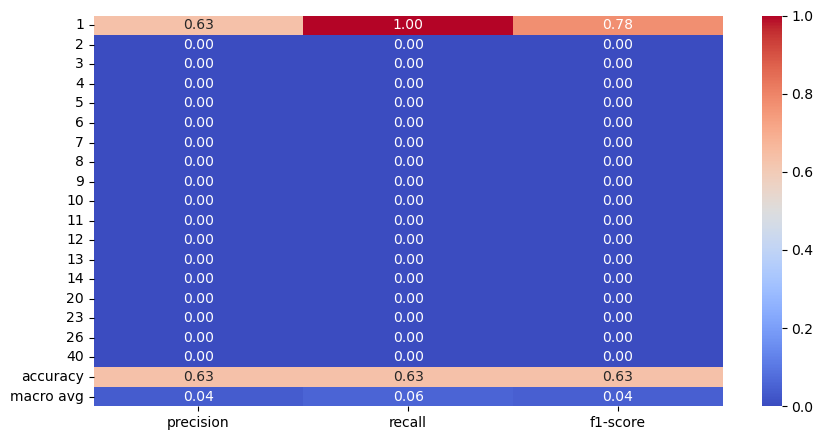

In [367]:
report = classification_report(y_test, y_pred, output_dict=True)
cm = pd.DataFrame(report).transpose()
axs = sns.heatmap(cm.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="coolwarm")
correlation_matrix = np.corrcoef(cm)
print(f"Correlação entre células: {correlation_matrix[0,1]:.2f}")



In [368]:
from sklearn.model_selection import cross_val_score

# avaliar o modelo usando a validação cruzada
scores = cross_val_score(logreg, X, y, cv=7)
print("Precisão: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Precisão: 0.58 (+/- 0.00)


In [369]:
# avaliar a precisão do modelo usando acurácia
acc = accuracy_score(y_test, y_pred)

print("Acurácia:", acc)


Acurácia: 0.6331877729257642


# Tradução do modelo para a Area de Negocios

In [370]:
# calcular a taxa de rotatividade antes do modelo e depois do modelo
score_rate_antes = y_test.mean()
score_rate_depois = y_pred.mean()
reducao_score_rate = score_rate_antes - score_rate_depois

print("Taxa de rotatividade antes do modelo: {:.2f}%".format(score_rate_antes * 100))
print("Taxa de rotatividade depois do modelo: {:.2f}%".format(score_rate_depois * 100))
print("Redução na taxa de rotatividade: {:.2f}%".format(reducao_score_rate * 100))

Taxa de rotatividade antes do modelo: 276.42%
Taxa de rotatividade depois do modelo: 100.00%
Redução na taxa de rotatividade: 176.42%


# Kneighbors Model

In [371]:
clf = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões com o modelo treinado
y_pred = clf.predict(X_test)

# Avaliar a precisão do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.71      0.90      0.79       145
           2       0.17      0.12      0.14        26
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.25      0.50      0.33         2
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00    

# Tradução do modelo para a Area de Negocios


In [372]:
score_rate_antes = y_test.mean()
score_rate_depois = y_pred.mean()
reducao_score_rate = score_rate_antes - score_rate_depois

# exibir os resultados
print("Taxa de rotatividade antes do modelo: {:.2f}%".format(score_rate_antes * 100))
print("Taxa de rotatividade depois do modelo: {:.2f}%".format(score_rate_depois * 100))
print("Redução na taxa de rotatividade: {:.2f}%".format(reducao_score_rate * 100))

Taxa de rotatividade antes do modelo: 276.42%
Taxa de rotatividade depois do modelo: 150.66%
Redução na taxa de rotatividade: 125.76%
